In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veman23","key":"23557e5443624dcce04924f4e58f8667"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
# Download the dataset
!kaggle datasets download -d jsonk11/social-media-advertising-dataset

# Unzip it
!unzip social-media-advertising-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/jsonk11/social-media-advertising-dataset
License(s): unknown
  0% 0.00/7.75M [00:00<?, ?B/s]
100% 7.75M/7.75M [00:00<00:00, 254MB/s]
Archive:  social-media-advertising-dataset.zip
  inflating: Social_Media_Advertising.csv  


In [4]:
import pandas as pd

# Load the CSV file (update filename if needed)
df = pd.read_csv("/content/Social_Media_Advertising.csv")

# Display the first few rows
df.head()


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony


In [5]:
df['Campaign_Goal'].unique()


array(['Product Launch', 'Market Expansion', 'Increase Sales',
       'Brand Awareness'], dtype=object)

In [6]:
df['Customer_Segment'].unique()


array(['Health', 'Home', 'Technology', 'Food', 'Fashion'], dtype=object)

In [8]:
df['Location'].unique()

array(['Las Vegas', 'Los Angeles', 'Austin', 'Miami', 'New York'],
      dtype=object)

In [9]:
df['Acquisition_Cost'].unique()

array(['$500.00', '$500.10', '$500.18', ..., '$14999.97', '$14999.98',
       '$15000.00'], dtype=object)

In [10]:
len(df)

300000

In [11]:
# Shape of the dataset
print("Rows, Columns:", df.shape)

# Summary of dataset
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


Rows, Columns: (300000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  objec

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,550444.804487,0.080009,3.177691,18153.670370,56034.236387,4.369217
std,260252.586037,0.040563,2.461200,11027.023294,32583.136334,3.156492
min,100001.000000,0.010000,0.000000,293.000000,1937.000000,1.000000
25%,325003.500000,0.050000,0.930000,8821.000000,28362.000000,1.000000
50%,551164.500000,0.080000,2.670000,17230.000000,54098.000000,4.000000
75%,776284.500000,0.110000,5.330000,26808.000000,80925.250000,7.000000
max,999998.000000,0.150000,8.000000,40000.000000,120000.000000,10.000000


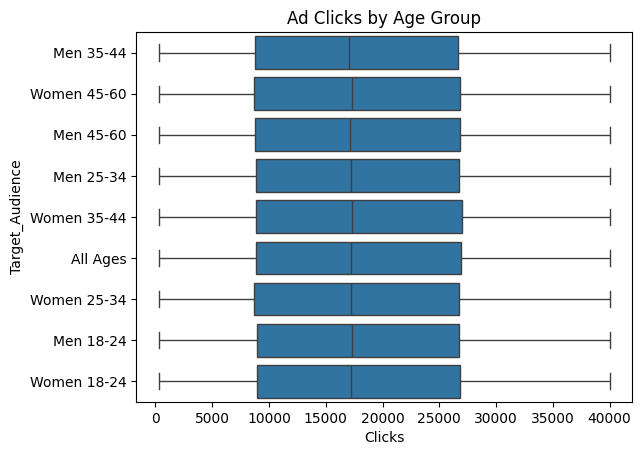

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Clicks', y='Target_Audience', data=df)
plt.title('Ad Clicks by Age Group')
plt.show()


In [13]:
# Clean Acquisition_Cost column
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

# Clean Duration column
df['Duration'] = df['Duration'].str.replace(' Days', '').astype(int)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create CTR (Click Through Rate)
df['CTR'] = df['Clicks'] / df['Impressions']

# Create Campaign_Description for NLP modeling
df['Campaign_Description'] = df.apply(lambda row: f"{row['Duration']}-day {row['Channel_Used']} campaign for {row['Campaign_Goal']} targeting {row['Target_Audience']} in {row['Location']} ({row['Customer_Segment']} segment)", axis=1)

# Define thresholds based on quantiles
low_thresh = df['ROI'].quantile(0.33)
high_thresh = df['ROI'].quantile(0.66)

# Function to categorize into Low, Medium, High
def label_success(roi):
    if roi <= low_thresh:
        return 0  # Low
    elif roi <= high_thresh:
        return 1  # Medium
    else:
        return 2  # High

# Apply the function
df['Success_Label'] = df['ROI'].apply(label_success)


# Extract Month and Quarter for trend analysis
df['Month'] = df['Date'].dt.month

df['Quarter'] = df['Date'].dt.quarter.astype(str)
df['Year_Quarter'] = df['Date'].dt.to_period("Q").astype(str)


In [14]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,...,Engagement_Score,Customer_Segment,Date,Company,CTR,Campaign_Description,Success_Label,Month,Quarter,Year_Quarter
0,529013,Men 35-44,Product Launch,15,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,...,7,Health,2022-02-25,Aura Align,0.166667,15-day Instagram campaign for Product Launch t...,2,2,1,2022Q1
1,275352,Women 45-60,Market Expansion,15,Facebook,0.01,500.0,7.210000,Los Angeles,French,...,5,Home,2022-05-12,Hearth Harmony,0.166667,15-day Facebook campaign for Market Expansion ...,2,5,2,2022Q2
2,692322,Men 45-60,Product Launch,15,Instagram,0.08,500.0,0.430000,Austin,Spanish,...,9,Technology,2022-06-19,Cyber Circuit,0.166667,15-day Instagram campaign for Product Launch t...,0,6,2,2022Q2
3,675757,Men 25-34,Increase Sales,15,Pinterest,0.03,500.0,0.909824,Miami,Spanish,...,1,Health,2022-09-08,Well Wish,0.151265,15-day Pinterest campaign for Increase Sales t...,0,9,3,2022Q3
4,535900,Men 45-60,Market Expansion,15,Pinterest,0.13,500.0,1.422828,Austin,French,...,1,Home,2022-08-24,Hearth Harmony,0.151265,15-day Pinterest campaign for Market Expansion...,1,8,3,2022Q3


In [28]:
df['Channel_Used'].unique()

array(['Instagram', 'Facebook', 'Pinterest', 'Twitter'], dtype=object)

In [ ]:
df['Acquisition_Cost'].unique()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)


eda_df = df.copy()

# 1. Basic Distributions

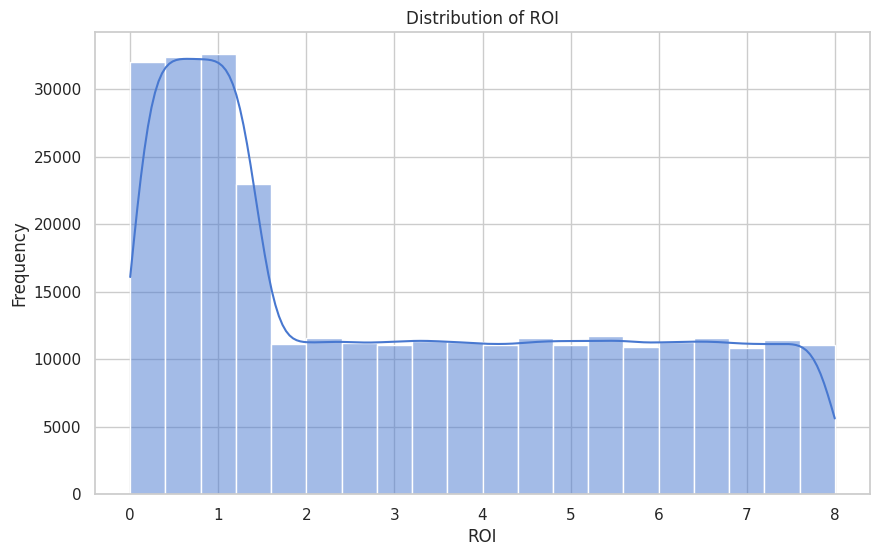

In [17]:
# ROI Distribution
sns.histplot(eda_df['ROI'], kde=True, bins=20)
plt.title("Distribution of ROI")
plt.xlabel("ROI")
plt.ylabel("Frequency")
plt.show()

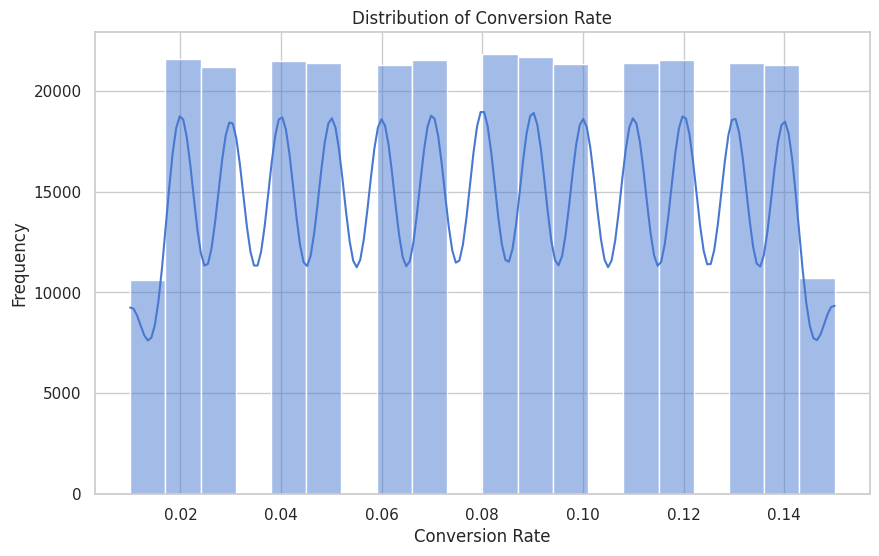

In [18]:
# Conversion Rate Distribution
sns.histplot(eda_df['Conversion_Rate'], kde=True, bins=20)
plt.title("Distribution of Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()

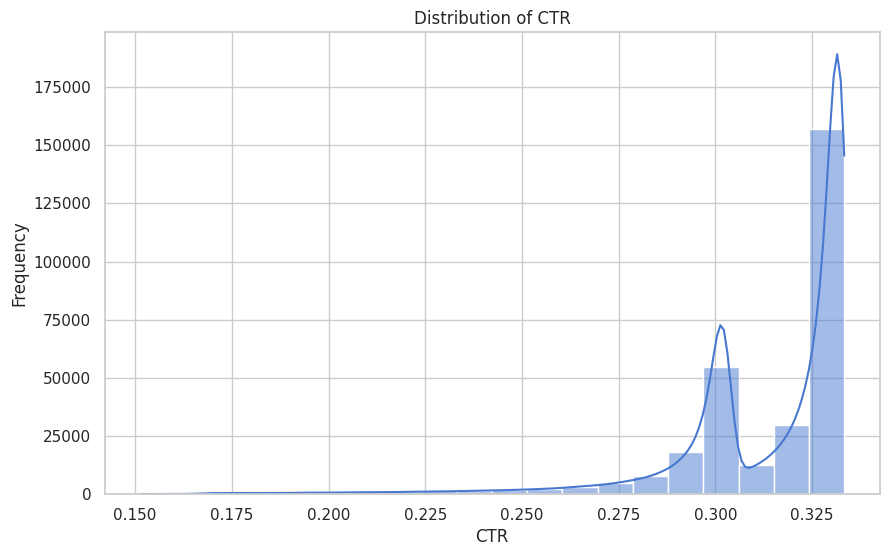

In [19]:
# CTR Distribution
sns.histplot(eda_df['CTR'], kde=True, bins=20)
plt.title("Distribution of CTR")
plt.xlabel("CTR")
plt.ylabel("Frequency")
plt.show()

# 2. Categorical Comparison Plots

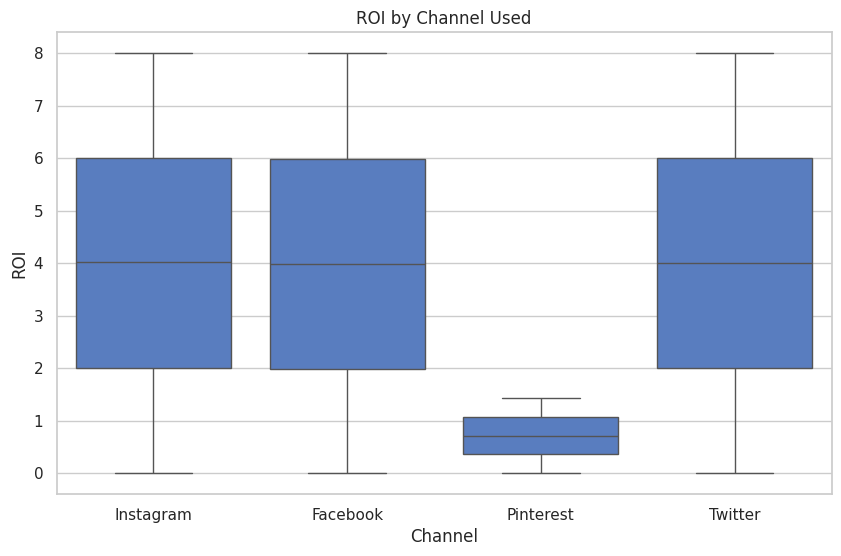

In [20]:
# ROI by Channel Used
sns.boxplot(x="Channel_Used", y="ROI", data=eda_df)
plt.title("ROI by Channel Used")
plt.xlabel("Channel")
plt.ylabel("ROI")
plt.show()

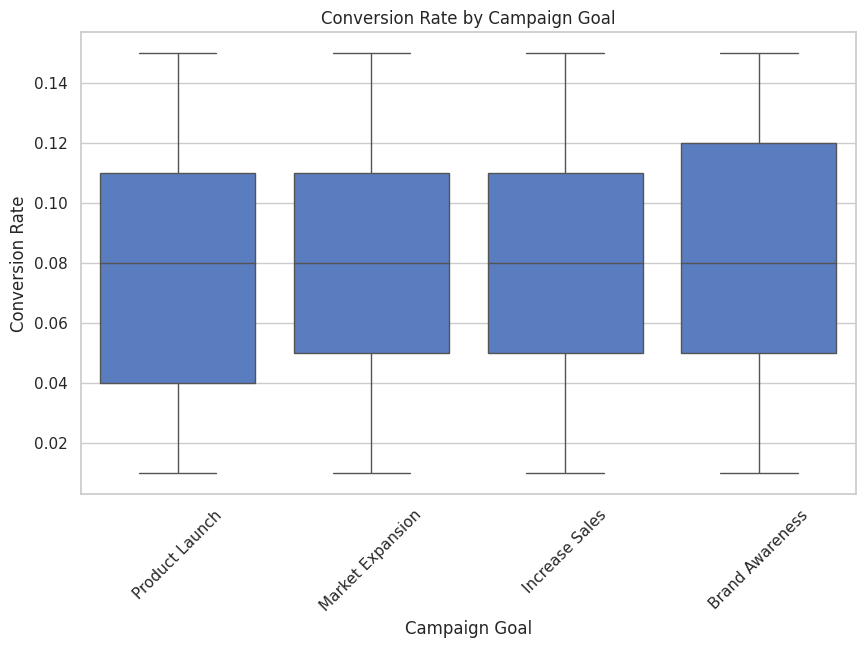

In [21]:
# Conversion Rate by Campaign Goal
sns.boxplot(x="Campaign_Goal", y="Conversion_Rate", data=eda_df)
plt.title("Conversion Rate by Campaign Goal")
plt.xlabel("Campaign Goal")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

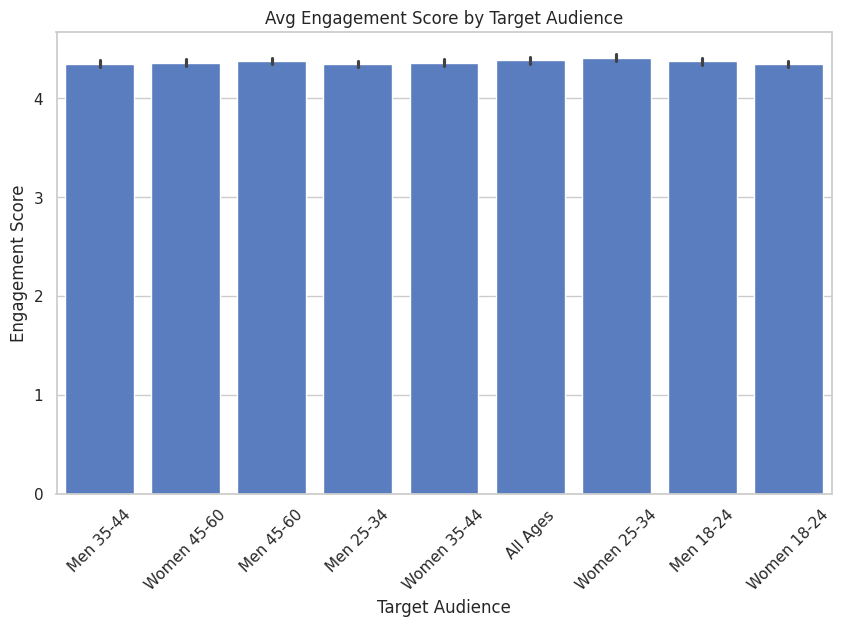

In [22]:
# Engagement Score by Target Audience
sns.barplot(x="Target_Audience", y="Engagement_Score", data=eda_df, estimator='mean')
plt.title("Avg Engagement Score by Target Audience")
plt.xlabel("Target Audience")
plt.ylabel("Engagement Score")
plt.xticks(rotation=45)
plt.show()

# 3. Time-Based Trends

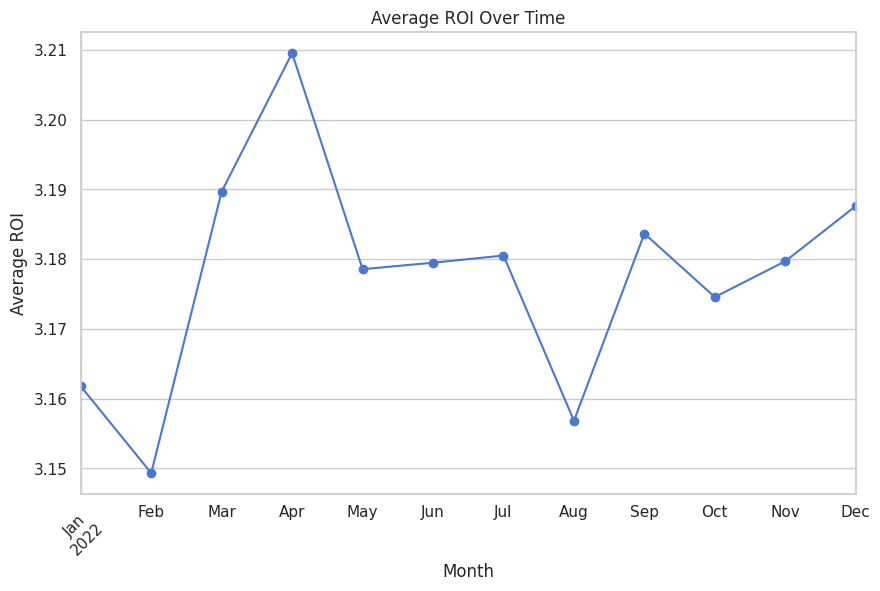

In [23]:
# ROI over time (monthly)
roi_monthly = eda_df.groupby(df['Date'].dt.to_period('M'))['ROI'].mean()
roi_monthly.plot(marker='o')
plt.title("Average ROI Over Time")
plt.xlabel("Month")
plt.ylabel("Average ROI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Correlation Heatmap

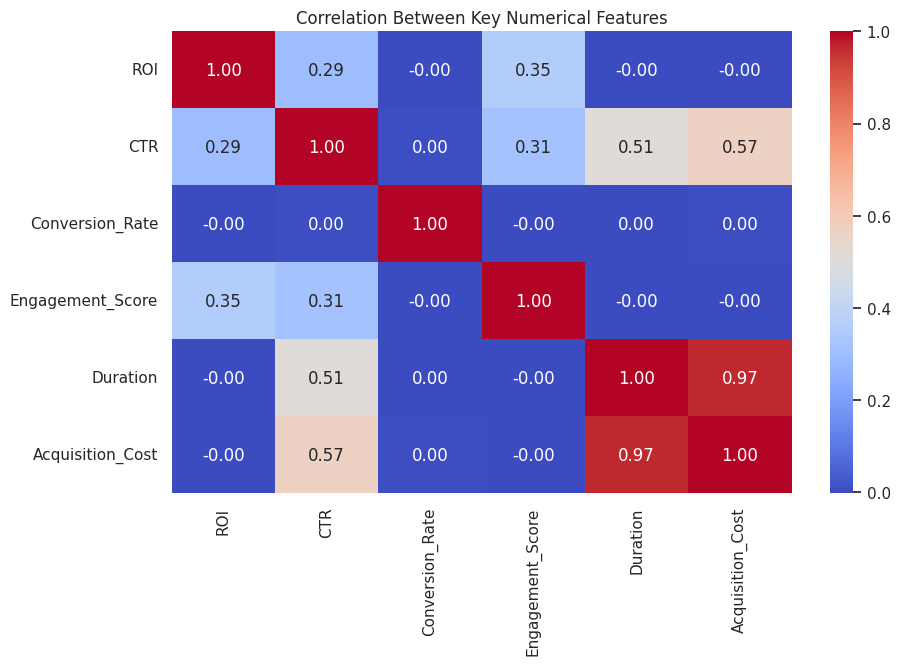

In [24]:
numerical_cols = ['ROI', 'CTR', 'Conversion_Rate', 'Engagement_Score', 'Duration', 'Acquisition_Cost']
corr = eda_df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Numerical Features")
plt.show()

# 5. Success Label Counts (0=Low, 1=Medium, 2=High)

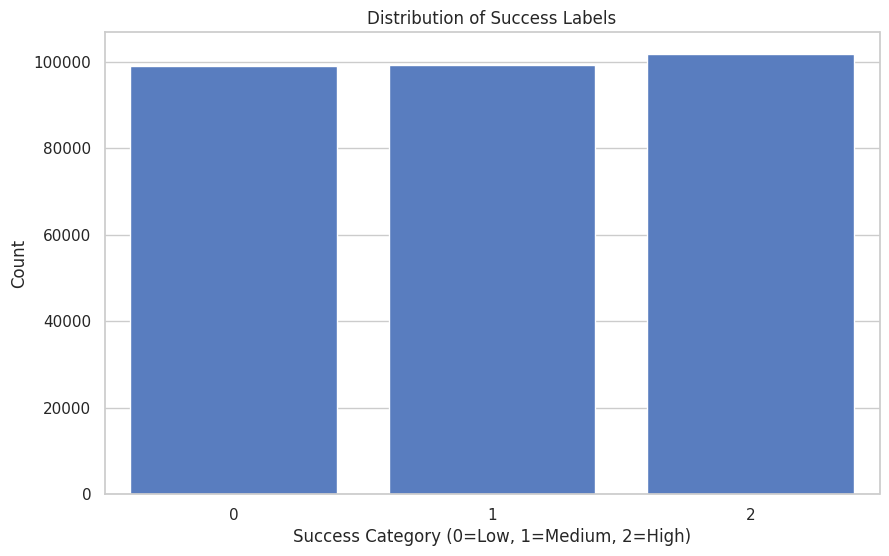

In [25]:
sns.countplot(x='Success_Label', data=eda_df)
plt.title("Distribution of Success Labels")
plt.xlabel("Success Category (0=Low, 1=Medium, 2=High)")
plt.ylabel("Count")
plt.show()

In [27]:
df.to_csv("cleaned_campaign_data.csv", index=False)
